In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fn_data_ss='./Data1/三峽氣象站.csv'
fn_data_gg='./Data1/公館氣象站.csv'
fn_data_tp='./Data1/臺北氣象站.csv'

df_rain_ss=pd.read_csv(fn_data_ss)
df_rain_gg=pd.read_csv(fn_data_gg)
df_rain_tp=pd.read_csv(fn_data_tp)
print(df_rain_ss.head())

     Stno              Datatime    PP01   PS01  RH01  TX01  WD01   WD02  \
0  C0AC60  2009/8/3 AM 01:00:00 -9997.0  992.5    68  31.5   3.0   94.0   
1  C0AC60  2009/8/3 AM 02:00:00 -9997.0  992.2    67  31.5   3.6   98.0   
2  C0AC60  2009/8/3 AM 03:00:00 -9997.0  992.0    70  31.1   3.9  104.0   
3  C0AC60  2009/8/3 AM 04:00:00 -9997.0  992.3    71  30.8   0.9  180.0   
4  C0AC60  2009/8/3 AM 05:00:00 -9997.0  992.4    76  29.8   0.6  208.0   

   Unnamed: 8  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [2]:
df_rain_ss['Datatime'] = pd.to_datetime(df_rain_ss['Datatime'] ,format='%Y/%m/%d %p %I:%M:%S') 
df_rain_ss['PP01'][df_rain_ss['PP01']<0]=0
df_rain_gg['Datatime'] = pd.to_datetime(df_rain_gg['Datatime'] ,format='%Y/%m/%d %p %I:%M:%S') 
df_rain_gg['PP01'][df_rain_gg['PP01']<0]=0
df_rain_tp['Datatime'] = pd.to_datetime(df_rain_tp['Datatime'] ,format='%Y/%m/%d %p %I:%M:%S') 
df_rain_tp['PP01'][df_rain_tp['PP01']<0]=0
df_rain_ss.head()

C:\Users\jason\AppData\Local\Temp\ipykernel_27300\2384322209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_ss['PP01'][df_rain_ss['PP01']<0]=0
C:\Users\jason\AppData\Local\Temp\ipykernel_27300\2384322209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_gg['PP01'][df_rain_gg['PP01']<0]=0
C:\Users\jason\AppData\Local\Temp\ipykernel_27300\2384322209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_tp['PP

,Stno,Datatime,PP01,PS01,RH01,TX01,WD01,WD02,Unnamed: 8
0,C0AC60,2009-08-03 01:00:00,0.0,992.5,68,31.5,3.0,94.0,NaN
1,C0AC60,2009-08-03 02:00:00,0.0,992.2,67,31.5,3.6,98.0,NaN
2,C0AC60,2009-08-03 03:00:00,0.0,992.0,70,31.1,3.9,104.0,NaN
3,C0AC60,2009-08-03 04:00:00,0.0,992.3,71,30.8,0.9,180.0,NaN
4,C0AC60,2009-08-03 05:00:00,0.0,992.4,76,29.8,0.6,208.0,NaN


#### I. Find the annual maximum series of weather stations from Central Weather Administration (中央氣象署) , C0AC60 (三峽), C1A730(公館), and 466920 (台北), for 6hour, 24 hour and 48 hour durations.

#### 三峽
- 6hr

In [3]:
annual_6hr_mx_ss=[]
df=df_rain_ss.rolling('6H',on='Datatime').sum()
for year in df['Datatime'].dt.year.unique():
    year_data = df[df['Datatime'].dt.year == year].copy()
    annual_6hr_mx_ss.append({'Year': year,
                             '6hr_max_rainfall':year_data['PP01'].max()})

annual_6hr_mx_df_ss = pd.DataFrame(annual_6hr_mx_ss)
print(annual_6hr_mx_df_ss.head())


   Year  6hr_max_rainfall
0  2009              43.0
1  2010             123.0
2  2011              94.5
3  2012             282.0
4  2013             110.5


C:\Users\jason\AppData\Local\Temp\ipykernel_27300\1222887203.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Stno'], dtype='object')
  df=df_rain_ss.rolling('6H',on='Datatime').sum()


- 24hr

In [4]:
annual_24hr_mx_ss=[]
df=df_rain_ss.rolling('24H',on='Datatime').sum()
for year in df['Datatime'].dt.year.unique():
    year_data = df[df['Datatime'].dt.year == year].copy()
    annual_24hr_mx_ss.append({'Year': year,
                             '24hr_max_rainfall':year_data['PP01'].max()})

annual_24hr_mx_df_ss = pd.DataFrame(annual_24hr_mx_ss)
print(annual_24hr_mx_df_ss.head())


C:\Users\jason\AppData\Local\Temp\ipykernel_27300\3968831367.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Stno'], dtype='object')
  df=df_rain_ss.rolling('24H',on='Datatime').sum()


   Year  24hr_max_rainfall
0  2009              101.0
1  2010              150.5
2  2011              142.0
3  2012              477.0
4  2013              199.0


- 48hr

In [5]:
annual_48hr_mx_ss=[]
df=df_rain_ss.rolling('48H',on='Datatime').sum()
for year in df['Datatime'].dt.year.unique():
    year_data = df[df['Datatime'].dt.year == year].copy()
    annual_48hr_mx_ss.append({'Year': year,
                             '48hr_max_rainfall':year_data['PP01'].max()})

annual_48hr_mx_df_ss = pd.DataFrame(annual_48hr_mx_ss)
print(annual_48hr_mx_df_ss.head())

C:\Users\jason\AppData\Local\Temp\ipykernel_27300\3473833911.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Stno'], dtype='object')
  df=df_rain_ss.rolling('48H',on='Datatime').sum()


   Year  48hr_max_rainfall
0  2009              132.0
1  2010              208.0
2  2011              152.5
3  2012              477.5
4  2013              314.5


#### 公館
- 6hr

In [6]:
annual_6hr_mx_gg=[]
df=df_rain_gg.rolling('6H',on='Datatime').sum()
for year in df['Datatime'].dt.year.unique():
    year_data = df[df['Datatime'].dt.year == year].copy()
    annual_6hr_mx_gg.append({'Year': year,
                             '6hr_max_rainfall':year_data['PP01'].max()})

annual_6hr_mx_df_gg = pd.DataFrame(annual_6hr_mx_gg)
print(annual_6hr_mx_df_gg.head())

C:\Users\jason\AppData\Local\Temp\ipykernel_27300\1417092005.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Stno'], dtype='object')
  df=df_rain_gg.rolling('6H',on='Datatime').sum()


   Year  6hr_max_rainfall
0  1987              91.5
1  1988              74.0
2  1989              81.0
3  1990             149.5
4  1991              75.0


- 24hr

In [7]:
annual_24hr_mx_gg=[]
df=df_rain_gg.rolling('24H',on='Datatime').sum()
for year in df['Datatime'].dt.year.unique():
    year_data = df[df['Datatime'].dt.year == year].copy()
    annual_24hr_mx_gg.append({'Year': year,
                             '24hr_max_rainfall':year_data['PP01'].max()})

annual_24hr_mx_df_gg = pd.DataFrame(annual_24hr_mx_gg)
print(annual_24hr_mx_df_gg.head())

C:\Users\jason\AppData\Local\Temp\ipykernel_27300\725511652.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Stno'], dtype='object')
  df=df_rain_gg.rolling('24H',on='Datatime').sum()


   Year  24hr_max_rainfall
0  1987              269.0
1  1988              146.0
2  1989              180.5
3  1990              213.5
4  1991              127.5


- 48hr

In [8]:
annual_48hr_mx_gg=[]
df=df_rain_gg.rolling('48H',on='Datatime').sum()
for year in df['Datatime'].dt.year.unique():
    year_data = df[df['Datatime'].dt.year == year].copy()
    annual_48hr_mx_gg.append({'Year': year,
                             '48hr_max_rainfall':year_data['PP01'].max()})

annual_48hr_mx_df_gg = pd.DataFrame(annual_48hr_mx_gg)
print(annual_48hr_mx_df_gg.head())

C:\Users\jason\AppData\Local\Temp\ipykernel_27300\3881240025.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Stno'], dtype='object')
  df=df_rain_gg.rolling('48H',on='Datatime').sum()


   Year  48hr_max_rainfall
0  1987              347.5
1  1988              193.5
2  1989              246.5
3  1990              282.5
4  1991              162.0


#### 臺北
- 6hr

In [9]:
annual_6hr_mx_tp=[]
df=df_rain_tp.rolling('6H',on='Datatime').sum()
for year in df['Datatime'].dt.year.unique():
    year_data = df[df['Datatime'].dt.year == year].copy()
    annual_6hr_mx_tp.append({'Year': year,
                             '6hr_max_rainfall':year_data['PP01'].max()})

annual_6hr_mx_df_tp = pd.DataFrame(annual_6hr_mx_tp)
print(annual_6hr_mx_df_tp.head())

   Year  6hr_max_rainfall
0  1985             110.0
1  1986             107.0
2  1987             114.5
3  1988             106.5
4  1989              91.5


- 24hr

In [10]:
annual_24hr_mx_tp=[]
df=df_rain_tp.rolling('24H',on='Datatime').sum()
for year in df['Datatime'].dt.year.unique():
    year_data = df[df['Datatime'].dt.year == year].copy()
    annual_24hr_mx_tp.append({'Year': year,
                             '24hr_max_rainfall':year_data['PP01'].max()})

annual_24hr_mx_df_tp = pd.DataFrame(annual_24hr_mx_tp)
print(annual_24hr_mx_df_tp.head())

   Year  24hr_max_rainfall
0  1985              176.0
1  1986              165.5
2  1987              223.0
3  1988              148.5
4  1989              127.5


- 48hr

In [11]:
annual_48hr_mx_tp=[]
df=df_rain_tp.rolling('48H',on='Datatime').sum()
for year in df['Datatime'].dt.year.unique():
    year_data = df[df['Datatime'].dt.year == year].copy()
    annual_48hr_mx_tp.append({'Year': year,
                             '48hr_max_rainfall':year_data['PP01'].max()})

annual_48hr_mx_df_tp = pd.DataFrame(annual_48hr_mx_tp)
print(annual_48hr_mx_df_tp.head())

   Year  48hr_max_rainfall
0  1985              190.2
1  1986              248.9
2  1987              290.7
3  1988              178.5
4  1989              208.1


In [12]:
annual_6hr_mx_df_ss.to_csv('./Data_output/annual_6hr_mx_df_ss.csv')
annual_24hr_mx_df_ss.to_csv('./Data_output/annual_24hr_mx_df_ss.csv')
annual_48hr_mx_df_ss.to_csv('./Data_output/annual_48hr_mx_df_ss.csv')
annual_6hr_mx_df_gg.to_csv('./Data_output/annual_6hr_mx_df_gg.csv')
annual_24hr_mx_df_gg.to_csv('./Data_output/annual_24hr_mx_df_gg.csv')
annual_48hr_mx_df_gg.to_csv('./Data_output/annual_48hr_mx_df_gg.csv')
annual_6hr_mx_df_tp.to_csv('./Data_output/annual_6hr_mx_df_tp.csv')
annual_24hr_mx_df_tp.to_csv('./Data_output/annual_24hr_mx_df_tp.csv')
annual_48hr_mx_df_tp.to_csv('./Data_output/annual_48hr_mx_df_tp.csv')

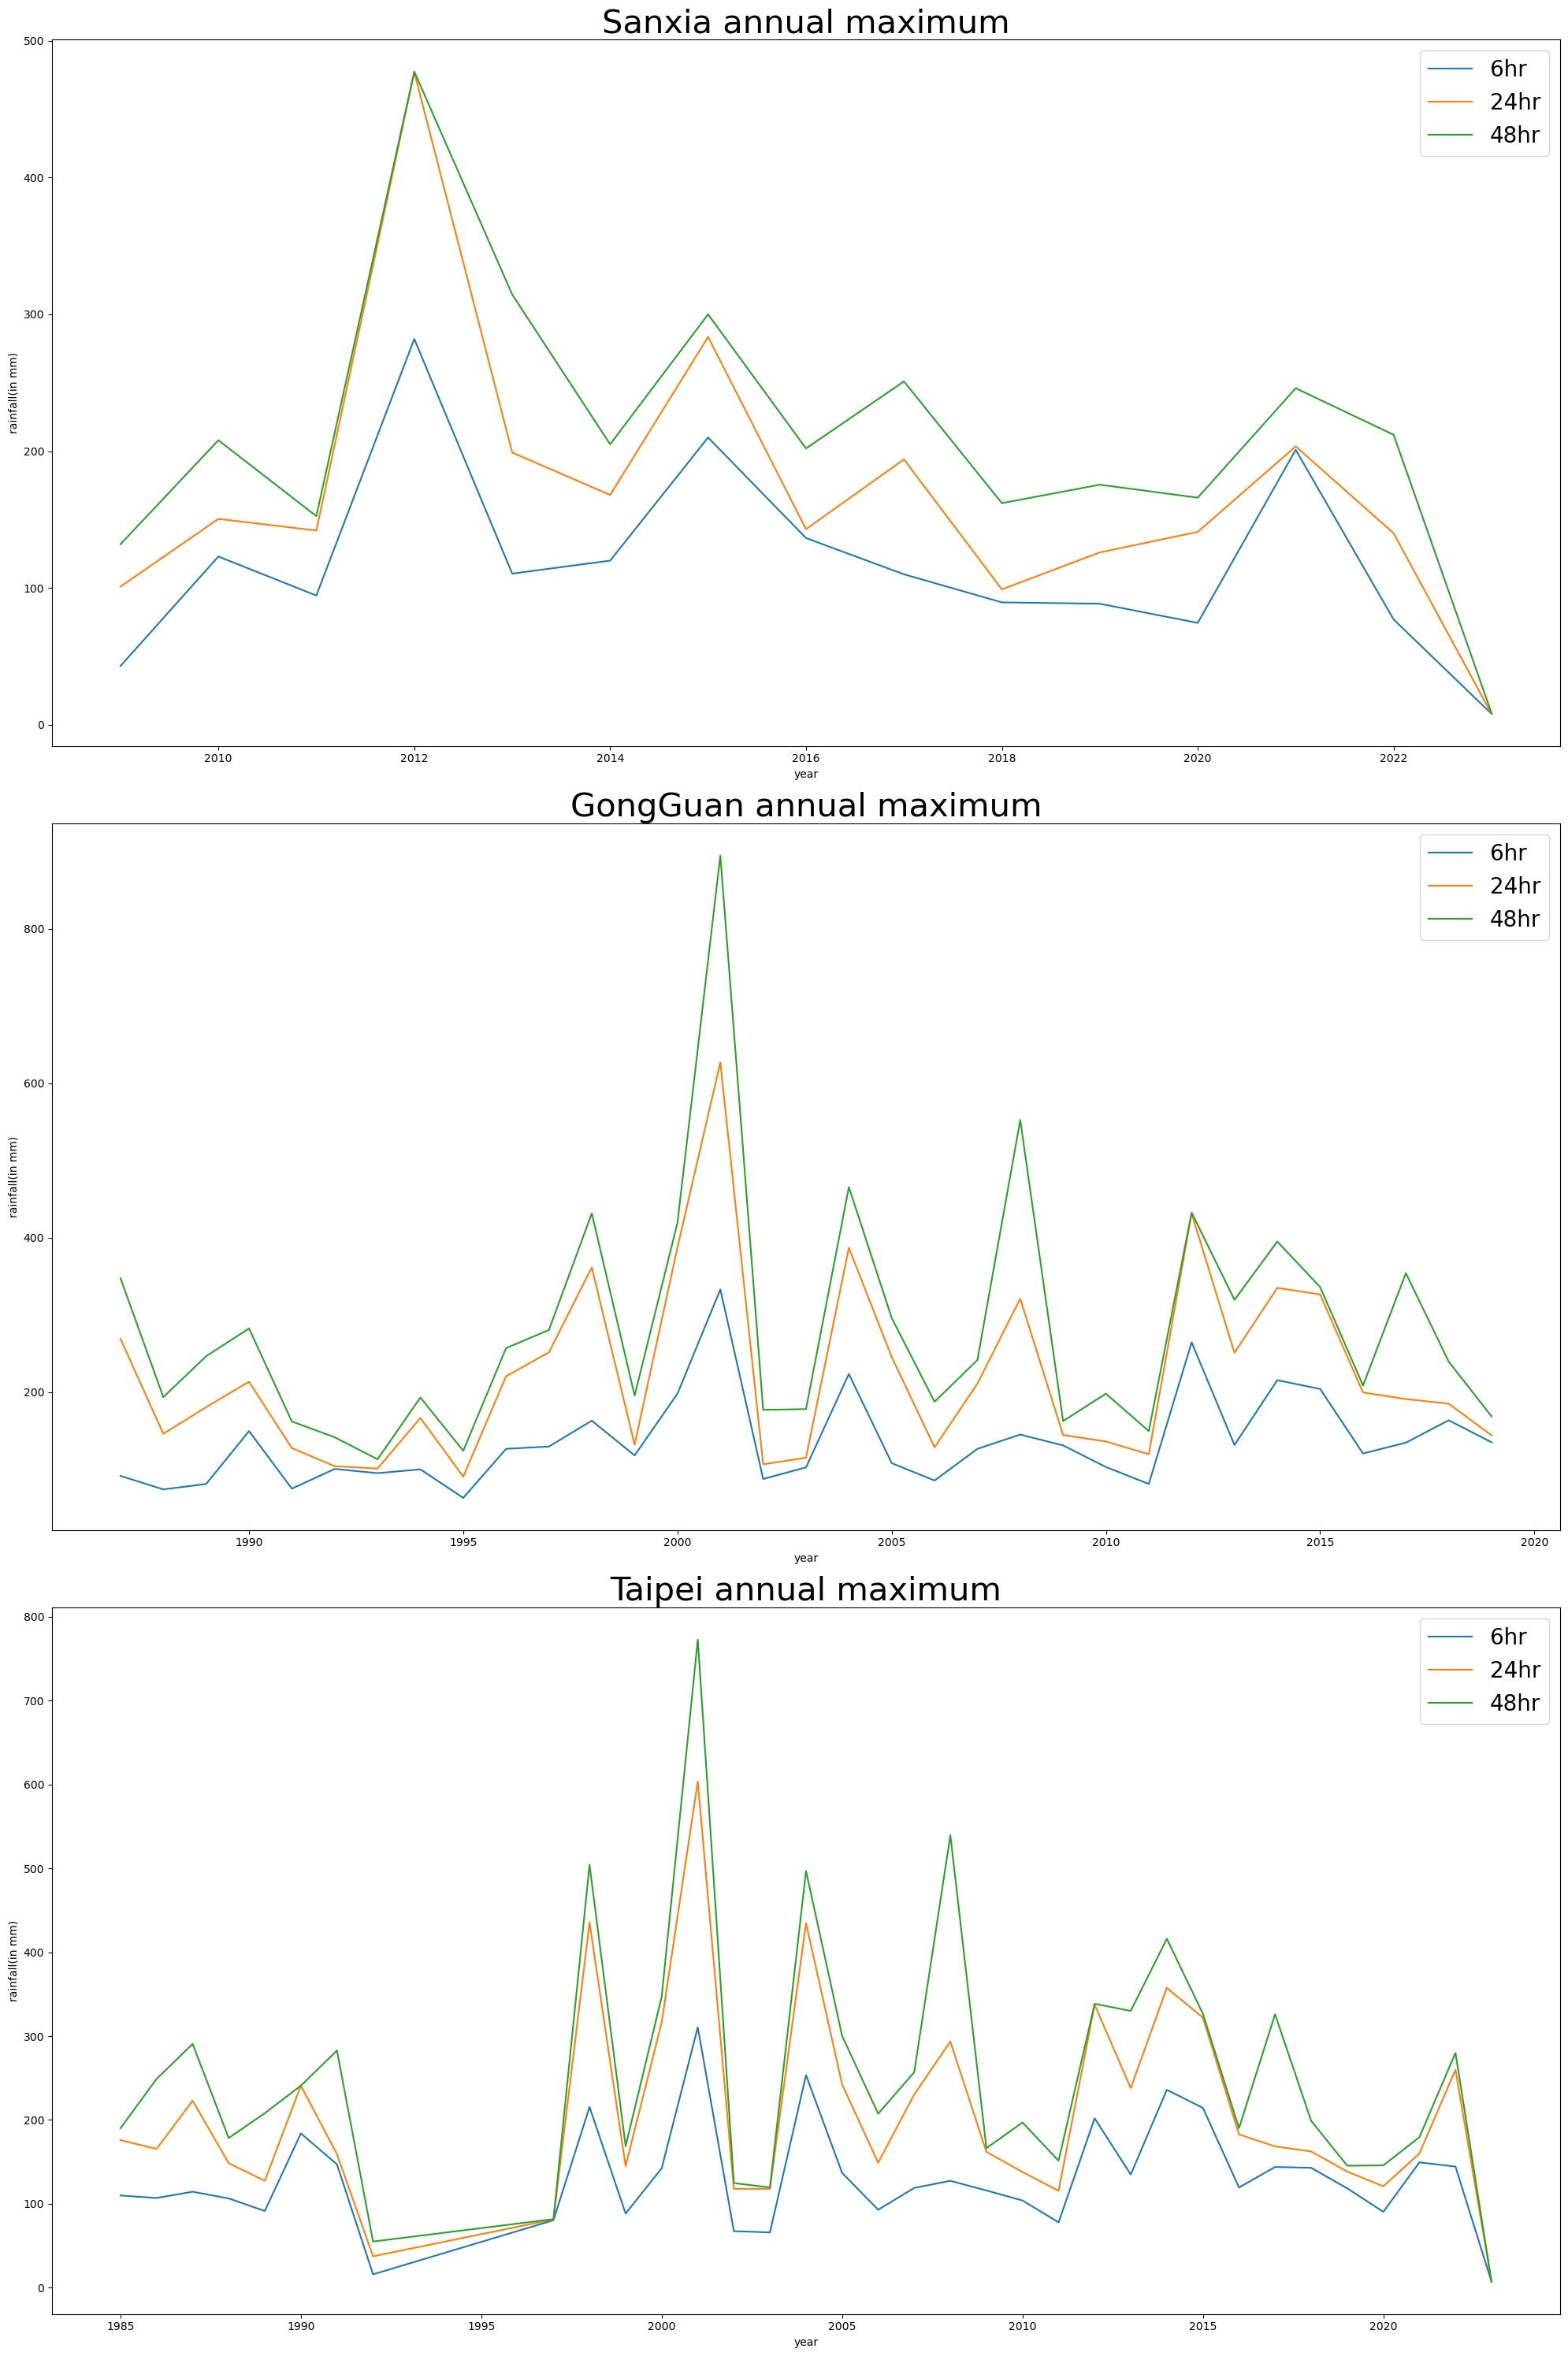

In [15]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(20, 30))
year_ss=annual_6hr_mx_df_ss['Year']
year_gg=annual_6hr_mx_df_gg['Year']
year_tp=annual_6hr_mx_df_tp['Year']

ax1.plot(year_ss,annual_6hr_mx_df_ss['6hr_max_rainfall'],label='6hr')
ax1.plot(year_ss,annual_24hr_mx_df_ss['24hr_max_rainfall'],label='24hr')
ax1.plot(year_ss,annual_48hr_mx_df_ss['48hr_max_rainfall'],label='48hr')
ax1.set_title('Sanxia annual maximum',fontsize=30)
ax1.set_xlabel('year')
ax1.set_ylabel('rainfall(in mm)')
ax1.legend(fontsize=20)

ax2.plot(year_gg,annual_6hr_mx_df_gg['6hr_max_rainfall'],label='6hr')
ax2.plot(year_gg,annual_24hr_mx_df_gg['24hr_max_rainfall'],label='24hr')
ax2.plot(year_gg,annual_48hr_mx_df_gg['48hr_max_rainfall'],label='48hr')
ax2.set_title('GongGuan annual maximum',fontsize=30)
ax2.set_xlabel('year')
ax2.set_ylabel('rainfall(in mm)')
ax2.legend(fontsize=20)

ax3.plot(year_tp,annual_6hr_mx_df_tp['6hr_max_rainfall'],label='6hr')
ax3.plot(year_tp,annual_24hr_mx_df_tp['24hr_max_rainfall'],label='24hr')
ax3.plot(year_tp,annual_48hr_mx_df_tp['48hr_max_rainfall'],label='48hr')
ax3.set_title('Taipei annual maximum',fontsize=30)
ax3.set_xlabel('year')
ax3.set_ylabel('rainfall(in mm)')
ax3.legend(fontsize=20)

plt.tight_layout()

plt.show()